In [192]:
# importing required python libraries 
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot
%matplotlib inline
pd.set_option('display.max_rows', 100)

In [193]:
# Reading the data from csv file and parsing the date to making it as index

df_base=pd.read_csv('data/processed/Deaths_processed.csv',
                       parse_dates=[0])  

df_base.sort_values('date',ascending=True).tail()

,date,India,US,Russia,Turkey,Brazil
550,2021-07-25,420967,610681,151352,50934,549924
551,2021-07-26,421382,610952,152069,50997,550502
552,2021-07-27,422022,611414,152836,51048,551835
553,2021-07-28,422662,611801,153620,51124,553179
554,2021-07-29,423217,612122,154404,51184,554497


# Forecasting Covid-19 Deaths in India for next 7 days

# Auto Regression Model

In [194]:
train, test = df_base.India[1:df_base.shape[0]-7], df_base.India[df_base.shape[0]-7:]

In [195]:
train_data, test_data = df_base[1:df_base.shape[0]-7], df_base[df_base.shape[0]-7:]

In [196]:
train_y,test_y = train_data['India'],test_data['India']

In [197]:
from statsmodels.tsa.ar_model import AR
AR_model = AR(train)
AR_model_fit = AR_model.fit()

C:\Users\Technumen7\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fu

In [198]:
AR_model_fit.k_ar # 18 no. of lag variables used for our model

18

In [199]:
AR_model_fit.params #coef of lag varibales

const        24.236706
L1.India      1.393477
L2.India     -0.199884
L3.India      0.068102
L4.India     -0.268224
L5.India      0.048156
L6.India      0.077185
L7.India     -0.198934
L8.India      0.236258
L9.India     -0.173735
L10.India    -0.032979
L11.India     0.028898
L12.India     0.093111
L13.India    -0.076928
L14.India     0.053416
L15.India    -0.117726
L16.India     0.138504
L17.India    -0.206792
L18.India     0.138168
dtype: float64

In [200]:
predictions = AR_model_fit.predict(start=len(train), end=len(train)+len(test)-1) #start & end of the predictions

In [201]:
predictions

548    420860.428612
549    421777.888617
550    422748.876858
551    424196.910764
552    424860.845377
553    426420.181981
554    427515.168053
dtype: float64

<AxesSubplot:title={'center':"AR Model - India's Covid-19 Deaths forecast for 7 days"}>

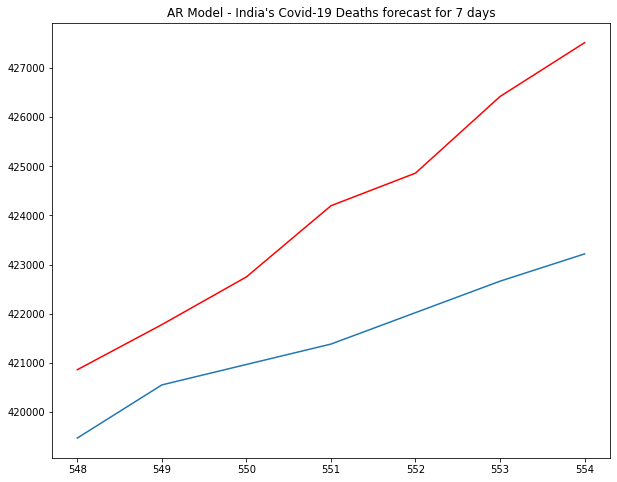

In [202]:
test_y.plot(title="AR Model - India's Covid-19 Deaths forecast for 7 days",figsize=(10,8))
predictions.plot(color='red')

# Moving Averages Model MA or ARMA

In [203]:
df_base['lag_d'] =  df_base['India'].shift(1) # calculating lag values, i.e values at prior time stamp.

In [204]:
df_base[['India','lag_d']].tail()

,India,lag_d
550,420967,420551.0
551,421382,420967.0
552,422022,421382.0
553,422662,422022.0
554,423217,422662.0


In [205]:
df_base['Residual'] = df_base['India'] - df_base['lag_d']  # calculating Residual

In [206]:
df_base[['India','lag_d','Residual']]

,India,lag_d,Residual
0,0,NaN,NaN
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
...,...,...,...
550,420967,420551.0,416.0
551,421382,420967.0,415.0
552,422022,421382.0,640.0
553,422662,422022.0,640.0


In [207]:
train, test = df_base.Residual[1:df_base.shape[0]-7], df_base.Residual[df_base.shape[0]-7:] # feeding residual values to the model as input

In [208]:
from statsmodels.tsa.ar_model import AR
AR_Model_Res = AR(train)
AR_Model_Fit_Res = AR_Model_Res.fit()

C:\Users\Technumen7\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fu

In [209]:
Prediction_Res = AR_Model_Fit_Res.predict(start=len(train), end=len(train)+len(test)-1)

In [210]:
Predictions = df_base.lag_d[df_base.shape[0]-7:] + Prediction_Res

<AxesSubplot:title={'center':"ARMA Model - India's Covid-19 Deaths forecast for 7 days"}>

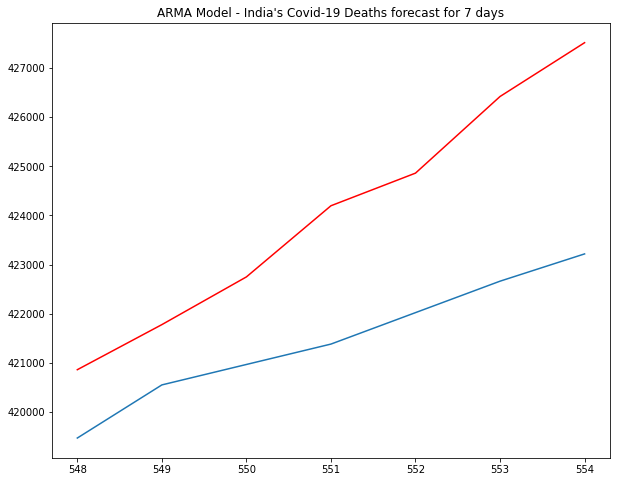

In [211]:
test_y.plot(title="ARMA Model - India's Covid-19 Deaths forecast for 7 days",figsize=(10,8))
predictions.plot(color='red')